In [1]:
# http://justinblaber.org/acquiring-stereo-images-with-spinnaker-api-hardware-trigger/

In [2]:
import matplotlib.pyplot as plt
import PySpin

In [3]:
# Set camera serial numbers

camera_serials = [22181547,22181612]
serial_1 = str(camera_serials[0])
serial_2 = str(camera_serials[1])

In [4]:
# Get system
system = PySpin.System.GetInstance()

In [5]:
# Get camera list
cam_list = system.GetCameras()
len(cam_list)

2

In [6]:
# Get cameras by serial
cam_1 = cam_list.GetBySerial(serial_1)
cam_2 = cam_list.GetBySerial(serial_2)

In [7]:
# Initialize cameras
cam_1.Init()
cam_2.Init()

In [8]:
# Set up primary camera trigger
cam_1.LineSelector.SetValue(PySpin.LineSelector_Line2)
cam_1.V3_3Enable.SetValue(True)

In [9]:
# Set up primary camera trigger
cam_2.LineSelector.SetValue(PySpin.LineSelector_Line2)
cam_2.V3_3Enable.SetValue(True)

In [10]:
# Set acquisition mode to acquire a single frame, this ensures acquired images are sync'd since camera 2 and 3 are setup to be triggered
cam_1.AcquisitionMode.SetValue(PySpin.AcquisitionMode_SingleFrame)
cam_2.AcquisitionMode.SetValue(PySpin.AcquisitionMode_SingleFrame)

In [11]:
# Start acquisition; note that secondary cameras have to be started first so acquisition of primary camera triggers secondary cameras.
cam_1.BeginAcquisition()
cam_2.BeginAcquisition()

In [12]:
# Acquire images
image_1 = cam_1.GetNextImage()
image_2 = cam_2.GetNextImage()

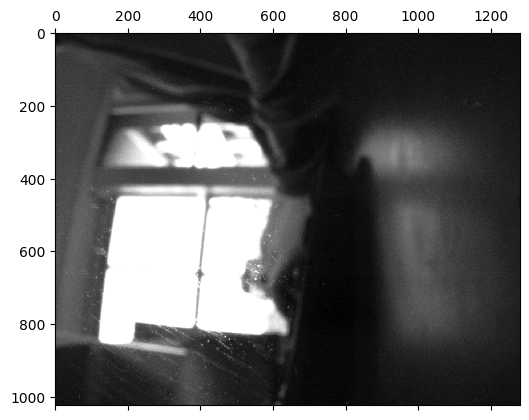

In [23]:
img_array = image_1.GetNDArray()
#img_chunk = image_1.GetChunkData()
tstamp = image_1.GetTimeStamp()
plt.matshow(img_array, cmap = plt.cm.Greys_r)

In [25]:
print(tstamp)

853932235920


In [16]:
image_2

<PySpin.ImagePtr; proxy of <Swig Object of type 'Spinnaker::ImagePtr *' at 0x7fd0240b3420> >

In [26]:
# Release images
image_1.Release()
image_2.Release()

In [27]:
# end acquisition
cam_1.EndAcquisition()
cam_2.EndAcquisition()

- start acquisition
- for each camera, 